### Steps followed:

1. Understand the data
2. Data cleaning 
3. Visualizing the data
4. Data prep (train-test split, rescaling, rfe)
5. Ridge regression
6. Lasso regression
7. Final Summary (Interpretation of ridge and lasso model)
8. Subjective questions

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error

from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

### Step 1: Understand the data

In [2]:
input_data = pd.read_csv("./train.csv")

In [3]:
input_data.shape

(1460, 81)

In [4]:
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
input_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
input_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Step 2: Data Cleaning
- Fix rows
- Fix columns
- Fix missing values
- Standardize values

In [7]:
# Fix rows

# Summary rows, header rows, extra rows - This is not applicable / present in this dataset

input_data[input_data.isna().all(axis=1)] # No blank rows in this dataset

# Check if duplicate rows present in the dataset
input_data.duplicated().any() # No duplicate rows in this dataset

False

In [8]:
# Fix columns

In [9]:
# 1. Delete unnecessary / blank columns

input_data.columns[input_data.isna().all()].tolist() # No blank columns in this dataset
input_data.drop('Id', axis=1, inplace=True)

In [10]:
# Fix missing values

print('These columns has significant missing values because one of the valid value of these column is NA. (filled NA in Cell 44)')
# 1. Columns with significant no. of missing values (greater than 95%)
cols_with_missing_values = input_data.columns[(input_data.isnull().sum() / len(input_data) * 100) > 90]
print(cols_with_missing_values)


# 2. Rows if missing value in a column are less than 2%
columns_with_missing_values = input_data.columns[((input_data.isnull().sum() / len(input_data) * 100) > 0 ) & 
                                                 ((input_data.isnull().sum() / len(input_data) * 100) <= 5)]
print(columns_with_missing_values)
# for col in columns_with_missing_values:
    # input_data = input_data[input_data[col].notna()]

These columns has significant missing values because one of the valid value of these column is NA. (filled NA in Cell 44)
Index(['Alley', 'PoolQC', 'MiscFeature'], dtype='object')
Index(['MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical'],
      dtype='object')


In [11]:
drop_rows_with_null_values = ['MasVnrType', 'MasVnrArea', 'Electrical']
for col in drop_rows_with_null_values:
    input_data = input_data[input_data[col].notna()]

In [12]:
update_columns_fill_missing_values =['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                                     'Alley', 'PoolQC', 'MiscFeature', 'FireplaceQu', 'Fence',
                                     'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

for col in update_columns_fill_missing_values:
    input_data[col].fillna('NA', inplace=True)

input_data['GarageYrBlt'].fillna(0, inplace=True)

input_data['LotFrontage'] = input_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [13]:
#### Standardize values

# 1. Converting year columns from float to int
input_data['GarageYrBlt'] = input_data['GarageYrBlt'].astype('int')

In [14]:
# 1. Create derived columns (out of year columns)
input_data['houseAge'] = input_data['YrSold'] - input_data['YearBuilt']
input_data['houseRemodAge'] = input_data['YrSold'] - input_data['YearRemodAdd']
input_data['garageAge'] = np.where((input_data["GarageYrBlt"] == 0), 0, (input_data['YrSold'] - input_data['GarageYrBlt']))
input_data['totalLivingArea'] = input_data['1stFlrSF'] + input_data['2ndFlrSF'] + input_data['TotalBsmtSF']


# 2. Total area (lot area), floor area (living area), garage area - are already available as a feature

### Step 3: Visualizing the data

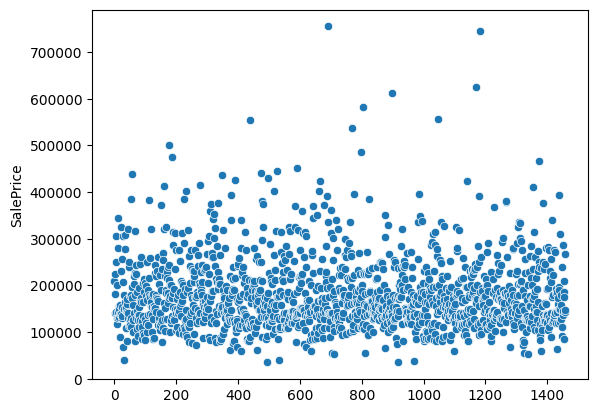

0.25    129900.0
0.50    162500.0
0.75    214000.0
0.80    230000.0
0.90    278000.0
0.95    325812.0
0.97    373250.0
0.98    394617.0
0.99    439390.0
Name: SalePrice, dtype: float64
No of records to be removed: 4


In [15]:
# Removing outliers - SalePrice

sns.scatterplot(input_data['SalePrice'])
plt.show()

print(input_data['SalePrice'].quantile([0.25, 0.5, 0.75, 0.80, 0.90, 0.95, 0.97, 0.98, 0.99]))
print(f"No of records to be removed: {len(input_data[input_data['SalePrice'] > 600000].index)}")

input_data = input_data[input_data['SalePrice'] <= 600000]

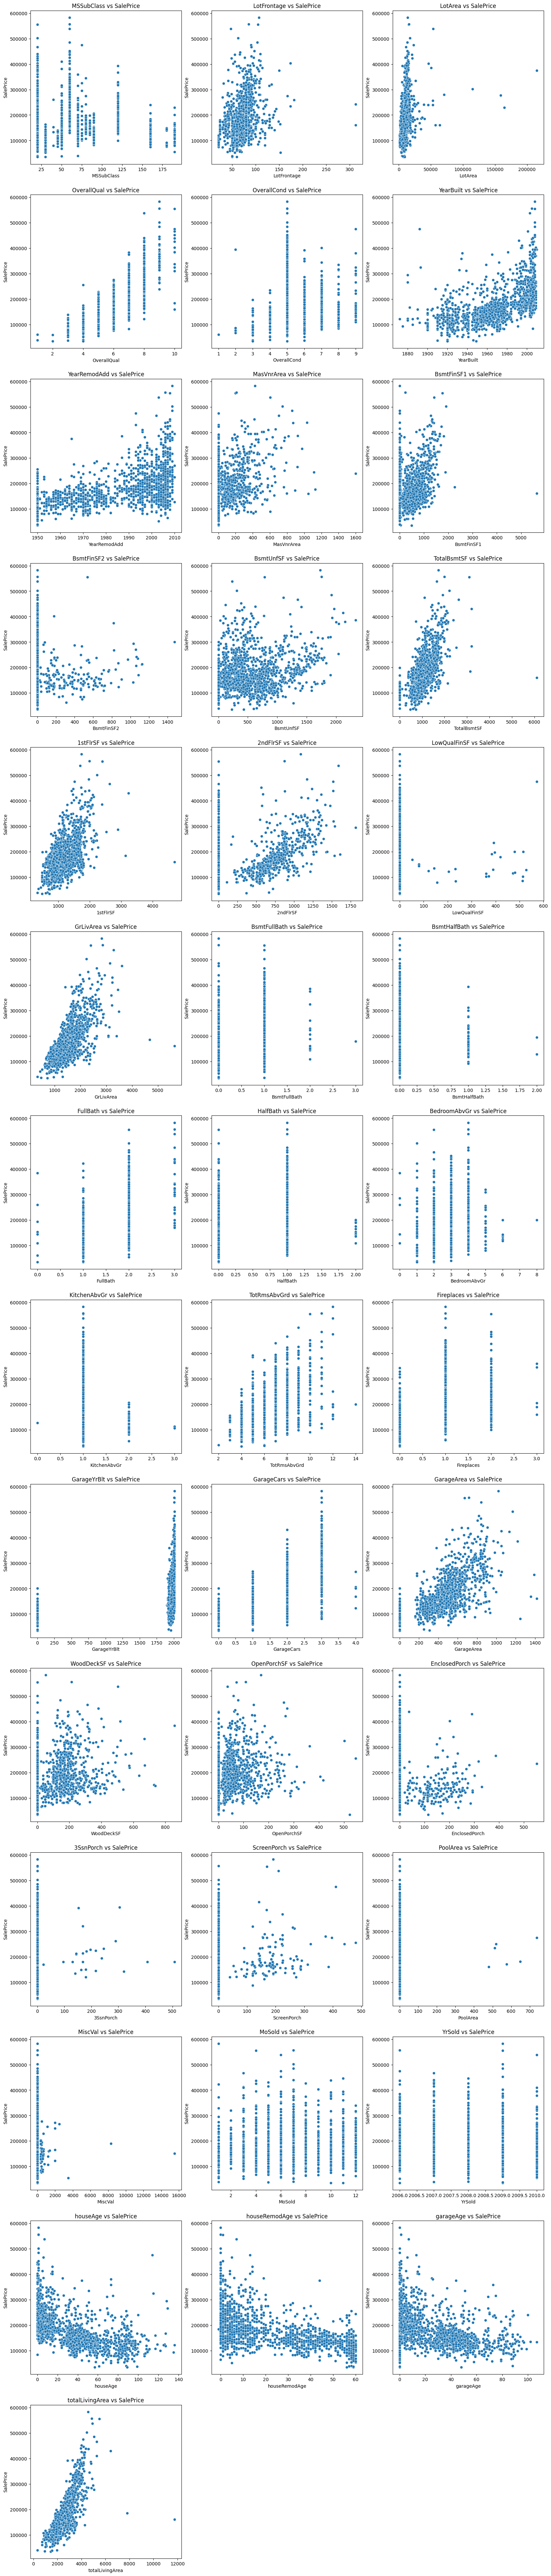

In [16]:
# numerical columns
target = 'SalePrice'
numerical_features = input_data.select_dtypes(include='number').columns
no_of_rows = round(len(numerical_features) / 3)

def show_box_plot(input_data, x_col, y_col, no_of_rows, i):
    plt.subplot(no_of_rows, 3, i)
    plt.title(f'{x_col} vs {y_col}')
    sns.scatterplot(data=input_data, x=x_col, y=y_col)

i = 0
plt.figure(figsize=(20, 100))
for col in numerical_features:
    if col != target:
        i = i+1
        show_box_plot(input_data, col, target, no_of_rows, i)

#### Inference:
- Most of the house lot area are within 50000 sq.ft
- Increase in OverallQual leads to increase in SalePrice
- House that are built / remodeled recently have higher SalePrice
- Increase in GarageArea leads to increase in SalePrice
- year sold doesn't seem to have any impact in SalePrice
- Increase in GarageAge leads to decrease in SalePrice
- Increase in total living area leads to increase in SalePrice


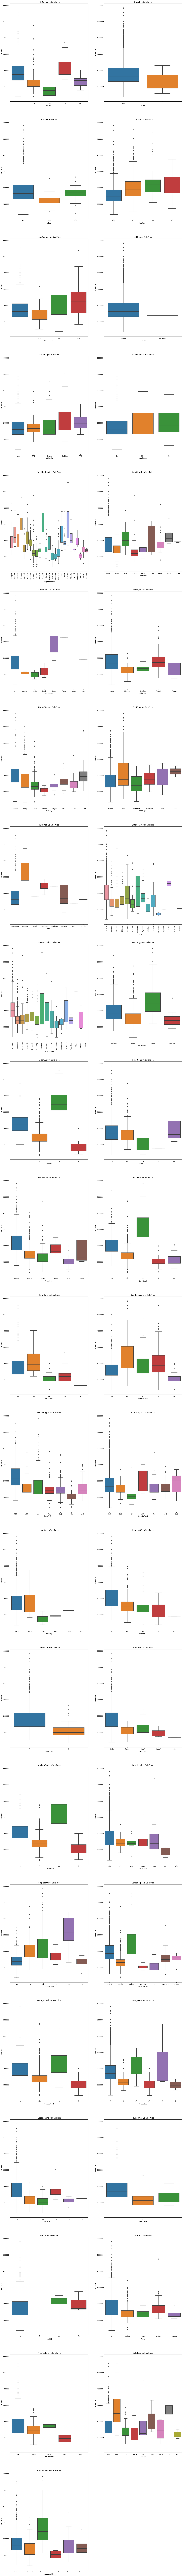

In [17]:
# categorical columns
categorical_features = input_data.select_dtypes(exclude='number').columns
no_of_rows = round(len(categorical_features) / 2)

def show_box_plot(input_data, x_col, y_col, no_of_rows, i):
    plt.subplot(no_of_rows, 2, i)
    if x_col in ['Neighborhood', 'Exterior1st', 'Exterior2nd']:
        plt.xticks(rotation = 90)
    plt.title(f'{x_col} vs {y_col}')
    sns.boxplot(data=input_data, x=x_col, y=y_col)

i = 0
plt.figure(figsize=(20, 300))
for col in categorical_features:
    i = i+1
    show_box_plot(input_data, col, 'SalePrice', no_of_rows, i)

#### Inference:
- Floating village residential area cost more compared to other zones
- Paved road / alley access to property cost more compared to gravel
- Houses with access to all public utilities cost more
- Physical locations like Stone Brook, Northridge Heights cost more
- Hip roofstyle cost more on average
- Houses with excellent quality of the material on the exterior cost more
- Houses with excellent heating quality type cost more
- Houses with central air conditioning cost more
- Houses with excellent kitchen quality cost more
- Houses with built-in garage type cost more
- Houses that are partially-built (associated with new homes) cost more

### Step 4: Data preparation for modelling

In [18]:
input_data = pd.get_dummies(input_data)

In [19]:
# Split the data into training (70%) and test set (30%)
df_train, df_test = train_test_split(input_data, train_size=0.7, test_size=0.3, random_state=50)

In [20]:
# Rescaling features (faster convergence and easy interpretation)
# 1. Instantiate an object
scaler = MinMaxScaler()

# Create a list of numeric variables
numerical_features = input_data.select_dtypes(include='number').columns

# 2. Fit on data
df_train[numerical_features] = scaler.fit_transform(df_train[numerical_features])
df_test[numerical_features] = scaler.transform(df_test[numerical_features])

In [21]:
# X_train, y_train
y_train = df_train.pop('SalePrice')
X_train = df_train

# X_test, y_test
y_test = df_test.pop('SalePrice')
X_test = df_test

### Automated RFE - Select top 100 features

In [22]:
rfe = RFE(estimator=Ridge(), n_features_to_select=100)
rfe = rfe.fit(X_train, y_train)

In [23]:
print("\n\nFeature ordering results by RFE")
print(list(zip(X_train.columns, rfe.support_, rfe.ranking_)), sep="\n")
    
print("\n\nFeature(s) removed by RFE approach")
print(X_train.columns[~rfe.support_])

selected_features = X_train.columns[rfe.support_]
X_train_rfe_1 = X_train[selected_features]
X_test_rfe_1 = X_test[selected_features]



Feature ordering results by RFE
[('MSSubClass', True, 1), ('LotFrontage', True, 1), ('LotArea', True, 1), ('OverallQual', True, 1), ('OverallCond', True, 1), ('YearBuilt', True, 1), ('YearRemodAdd', False, 159), ('MasVnrArea', True, 1), ('BsmtFinSF1', True, 1), ('BsmtFinSF2', False, 176), ('BsmtUnfSF', False, 74), ('TotalBsmtSF', True, 1), ('1stFlrSF', True, 1), ('2ndFlrSF', True, 1), ('LowQualFinSF', False, 17), ('GrLivArea', True, 1), ('BsmtFullBath', True, 1), ('BsmtHalfBath', False, 93), ('FullBath', True, 1), ('HalfBath', False, 69), ('BedroomAbvGr', True, 1), ('KitchenAbvGr', True, 1), ('TotRmsAbvGrd', True, 1), ('Fireplaces', True, 1), ('GarageYrBlt', True, 1), ('GarageCars', True, 1), ('GarageArea', True, 1), ('WoodDeckSF', True, 1), ('OpenPorchSF', False, 57), ('EnclosedPorch', False, 14), ('3SsnPorch', True, 1), ('ScreenPorch', True, 1), ('PoolArea', True, 1), ('MiscVal', False, 123), ('MoSold', False, 64), ('YrSold', False, 134), ('houseAge', True, 1), ('houseRemodAge', Fa

In [24]:
# Drop features having VIF > 7
def calculate_vif(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by='VIF', ascending=False)
    
    return vif

vif = calculate_vif(X_train_rfe_1)
X_train_rfe_2 = X_train_rfe_1.drop(vif[vif['VIF'] > 7].Features, axis=1)
X_test_rfe_2 = X_test_rfe_1.drop(vif[vif['VIF'] > 7].Features, axis=1)

In [25]:
print(f'Input shape after removing high VIF: {X_train_rfe_2.shape}')

Input shape after removing high VIF: (1012, 73)


### Step 5: Ridge Regression model

In [26]:
# list of alphas to tune - If alpha is too high, it will lead to underfitting.
# If it's too low, it will not handle overfitting

def cross_validation(estimator_obj, params):    
    folds = 7
    model_cv = GridSearchCV(estimator=estimator_obj,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)
    return model_cv
    

In [27]:
ridge = Ridge()
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}
model_cv = cross_validation(ridge, params)
model_cv = model_cv.fit(X_train_rfe_2, y_train)

best_alpha = model_cv.best_params_['alpha']

print(f'The best hyperparameter alpha value for ridge is {best_alpha}')

# Fitting ridge model for best alpha value and printing coefficients which have been penalised
ridge = Ridge(alpha=best_alpha)
ridge.fit(X_train_rfe_2, y_train)

Fitting 7 folds for each of 28 candidates, totalling 196 fits
The best hyperparameter alpha value for ridge is 2.0


Ridge(alpha=2.0)

In [28]:
def calculate_metrics(estimator_obj, X_train_rfe, X_test_rfe, y_train, y_test):
    metrics = []
    
    y_pred_train = estimator_obj.predict(X_train_rfe)
    y_pred_test = estimator_obj.predict(X_test_rfe)
    
    # R2 score
    r2_train = r2_score(y_train, y_pred_train)
    print(f'R2 score for train dataset: {r2_train}')
    metrics.append(r2_train)
    
    r2_test = r2_score(y_test, y_pred_test)
    print(f'R2 score for test dataset: {r2_test}')
    metrics.append(r2_test)
    
    # RSS
    rss_train = np.sum(np.square(y_train, y_pred_train))
    print(f'RSS for train dataset: {rss_train}')
    metrics.append(rss_train)
    
    rss_test = np.sum(np.square(y_test, y_pred_test))
    print(f'RSS for test dataset: {rss_test}')
    metrics.append(rss_test)
    
    # MSE
    mse_train = mean_squared_error(y_train, y_pred_train)
    print(f'MSE for train dataset: {mse_train}')
    metrics.append(mse_train)
    
    mse_test = mean_squared_error(y_test, y_pred_test)
    print(f'MSE for test dataset: {mse_test}')
    metrics.append(mse_test)
    
    return metrics


ridge_metrics = calculate_metrics(ridge, X_train_rfe_2, X_test_rfe_2, y_train, y_test)

R2 score for train dataset: 0.8756618998023211
R2 score for test dataset: 0.8406663862518757
RSS for train dataset: 86.32109056583874
RSS for test dataset: 40.58799990903397
MSE for train dataset: 0.03267650578862256
MSE for test dataset: 0.03424382444820518


### Step 6: Lasso Regression

In [29]:
lasso = Lasso()
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}
model_cv = cross_validation(lasso, params)
model_cv = model_cv.fit(X_train_rfe_2, y_train)

best_alpha = model_cv.best_params_['alpha']

print(f'The best hyperparameter alpha value for lasso is {best_alpha}')

# Fitting lasso model for best alpha value and printing coefficients which have been penalised
lasso = Lasso(alpha=best_alpha)
lasso.fit(X_train_rfe_2, y_train)

lasso_metrics = calculate_metrics(lasso, X_train_rfe_2, X_test_rfe_2, y_train, y_test)

Fitting 7 folds for each of 28 candidates, totalling 196 fits
The best hyperparameter alpha value for lasso is 0.0001
R2 score for train dataset: 0.874485196237641
R2 score for test dataset: 0.8451383925832601
RSS for train dataset: 86.32109056583874
RSS for test dataset: 40.58799990903397
MSE for train dataset: 0.03267650578862256
MSE for test dataset: 0.03424382444820518


In [30]:
# Create a table which contain all metrics

lr_table = {'Metric': ['R2 Score (train)', 'R2 Score (test)', 'RSS (train)', 'RSS (test)',
                       'MSE (train)', 'MSE (test)'], 'Ridge Regression': ridge_metrics}
ridge_metric = pd.DataFrame(lr_table, columns=['Metric', 'Ridge Regression'])
lasso_metric = pd.Series(lasso_metrics, name ='Lasso Regression')

final_metric = pd.concat([ridge_metric, lasso_metric], axis=1)
final_metric

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (train),0.875662,0.874485
1,R2 Score (test),0.840666,0.845138
2,RSS (train),86.321091,86.321091
3,RSS (test),40.588000,40.588000
4,MSE (train),0.032677,0.032677
5,MSE (test),0.034244,0.034244


In [31]:
def get_important_predictor_variables(input_data_rfe, estimator_obj, estimator_type):
    feature_coeff = pd.DataFrame()
    feature_coeff['features'] = input_data_rfe.columns
    feature_coeff['coefficients'] = estimator_obj.coef_
    
    print(f'Top 9 features selected by {estimator_type} regression')
    display(feature_coeff.sort_values(by='coefficients', ascending=False).head(9))
    

In [32]:
get_important_predictor_variables(X_train_rfe_2, ridge, 'ridge')
get_important_predictor_variables(X_train_rfe_2, lasso, 'lasso')

Top 9 features selected by ridge regression


,features,coefficients
2,OverallQual,0.193852
10,TotRmsAbvGrd,0.144159
13,GarageCars,0.093927
36,Neighborhood_StoneBr,0.083922
33,Neighborhood_NoRidge,0.079080
14,GarageArea,0.077104
1,LotArea,0.069968
7,FullBath,0.065676
34,Neighborhood_NridgHt,0.063913


Top 9 features selected by lasso regression


,features,coefficients
2,OverallQual,0.230236
10,TotRmsAbvGrd,0.156431
13,GarageCars,0.095487
36,Neighborhood_StoneBr,0.085226
1,LotArea,0.083749
33,Neighborhood_NoRidge,0.079612
14,GarageArea,0.072345
34,Neighborhood_NridgHt,0.064377
7,FullBath,0.058281


##### Final Summary:

Optimal value of lambda for ridge is 2.0
Optimal value of lambda for lasso is 0.0001

R2 score  and Mean squared value has negligible difference between ridge and lasso regression.
Ridge regression R2 score (for test data) –  0.840605
Lasso regression R2 score (for test data) – 0.843009

Ridge regression MSE (for test data) – 0.034244
Lasso regression MSE (for test data) – 0.034244

I would choose lasso regression here since there’s no big difference in r2 score or MSE and lasso reduces some of the features (coefficient as 0)


##### Subjective questions

Question 1

What is the optimal value of alpha for ridge and lasso regression?
What will be the changes in the model if you choose double the value of alpha for both ridge and lasso?
What will be the most important predictor variables after the change is implemented?

Optimal value of alpha for ridge is 2.0
Optimal value of alpha for lasso is 0.0001


In [33]:
ridge_doubled_alpha = 2.0*2
ridge = Ridge(alpha=ridge_doubled_alpha)
ridge.fit(X_train_rfe_2, y_train)
print(f'After doubling alpha {ridge_doubled_alpha} for ridge:')
ridge_metrics = calculate_metrics(ridge, X_train_rfe_2, X_test_rfe_2, y_train, y_test)

lasso_doubled_alpha = 0.0001*2
lasso = Lasso(alpha=lasso_doubled_alpha)
lasso.fit(X_train_rfe_2, y_train)
print(f'\nAfter doubling alpha {lasso_doubled_alpha} for lasso:')
lasso_metrics = calculate_metrics(lasso, X_train_rfe_2, X_test_rfe_2, y_train, y_test)

After doubling alpha 4.0 for ridge:
R2 score for train dataset: 0.8708526380741173
R2 score for test dataset: 0.8406054906330516
RSS for train dataset: 86.32109056583874
RSS for test dataset: 40.58799990903397
MSE for train dataset: 0.03267650578862256
MSE for test dataset: 0.03424382444820518

After doubling alpha 0.0002 for lasso:
R2 score for train dataset: 0.8669429420508084
R2 score for test dataset: 0.8430090028823664
RSS for train dataset: 86.32109056583874
RSS for test dataset: 40.58799990903397
MSE for train dataset: 0.03267650578862256
MSE for test dataset: 0.03424382444820518


In [34]:
get_important_predictor_variables(X_train_rfe_2, ridge, 'ridge')
get_important_predictor_variables(X_train_rfe_2, lasso, 'lasso')

Top 9 features selected by ridge regression


,features,coefficients
2,OverallQual,0.179342
10,TotRmsAbvGrd,0.128423
13,GarageCars,0.092059
36,Neighborhood_StoneBr,0.078471
33,Neighborhood_NoRidge,0.076238
14,GarageArea,0.072821
7,FullBath,0.069749
34,Neighborhood_NridgHt,0.061532
58,BsmtQual_Ex,0.054206


Top 9 features selected by lasso regression


,features,coefficients
2,OverallQual,0.239815
10,TotRmsAbvGrd,0.148355
13,GarageCars,0.094765
36,Neighborhood_StoneBr,0.081813
33,Neighborhood_NoRidge,0.079124
34,Neighborhood_NridgHt,0.063307
14,GarageArea,0.059730
7,FullBath,0.058502
6,BsmtFullBath,0.055096


Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data.
You will now have to create another model excluding the five most important predictor variables.
Which are the five most important predictor variables now?

In [35]:
top_5_features = ['OverallQual', 'TotRmsAbvGrd', 'GarageCars', 'Neighborhood_StoneBr', 'LotArea']
X_train_rfe_3 = X_train_rfe_2.drop(top_5_features, axis=1)
X_test_rfe_3 = X_test_rfe_2.drop(top_5_features, axis=1)

lasso = Lasso()
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}
model_cv = cross_validation(lasso, params)
model_cv = model_cv.fit(X_train_rfe_3, y_train)

best_alpha = model_cv.best_params_['alpha']

print(f'The best hyperparameter alpha value for lasso is {best_alpha}')

# Fitting lasso model for best alpha value and printing coefficients which have been penalised
lasso = Lasso(alpha=best_alpha)
lasso.fit(X_train_rfe_3, y_train)

lasso_metrics = calculate_metrics(lasso, X_train_rfe_3, X_test_rfe_3, y_train, y_test)
get_important_predictor_variables(X_train_rfe_3, lasso, 'lasso')


Fitting 7 folds for each of 28 candidates, totalling 196 fits
The best hyperparameter alpha value for lasso is 0.0001
R2 score for train dataset: 0.8180898330839224
R2 score for test dataset: 0.7841637724147644
RSS for train dataset: 86.32109056583874
RSS for test dataset: 40.58799990903397
MSE for train dataset: 0.03267650578862256
MSE for test dataset: 0.03424382444820518
Top 9 features selected by lasso regression


,features,coefficients
10,GarageArea,0.217050
5,FullBath,0.165243
29,Neighborhood_NoRidge,0.101227
45,RoofStyle_Shed,0.086963
6,BedroomAbvGr,0.082493
8,Fireplaces,0.082410
53,BsmtQual_Ex,0.078159
4,BsmtFullBath,0.069320
60,KitchenQual_Ex,0.066609
